Text provided under Creative Commons Attribution License CC-BY.  All Code is made available
under the FSF-approved BSD-3 license (c) Lorena A. Barba, Gilbert F. Forsyth 2017. Thanks to
NSF for support via CAREER award #1149784. 

Source: https://github.com/barbagroup/CFDPython/blob/master/lessons/02_Step_2.ipynb
This if from a class on learning to program CFD using Python by Dr. Lorena A. Barba

<h1>Step 2: 1-D Nonlinear Convection</h1>
Also called the "Invicid Burgers" equation
    du/dt +u*(du/dx) = 0
Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now nonlinear. We're going to use the same discretization as in Step 1 — forward difference in time and backward difference in space. Here is the discretized equation.
    (ui(n+1)-ui(n))/dt + ui(n)*(ui(n)-Ui-i(n))/dx = 0
solving for the unknown term ui(n+1) yields
    ui(n+1) = ui(n)- ui(n)*(dt/dx)*(ui(n)-ui-1(n))

The above equation basically replaces c with ui(at n) which causes the equation to become non-linear.
this non-linearity allows discontinuities from smooth initial conditions, which correspond to 
shock waves in the media for supersonic flow.

As before, the Python code starts by loading the necessary libraries. Then, we declare some variables that determine the discretization in space and time (you should experiment by changing these parameters to see what happens). Then, we create the initial condition $u_0$ by initializing the array for the solution using $u = 2\ @\ 0.5 \leq x \leq 1$ and $u = 1$ everywhere else in $(0,2)$ (i.e., same hat function as step 1).

In [12]:
#Remember: Comments in python are denoted by the pound sign 
import numpy                   # Load the numpy maxrix algebra library 
from matplotlib import pyplot  # Load pyplot from the matplotlib librry for 2D plotting
# The following code makes the matplotlib plots appear in the notebook instead of a separate window.
%matplotlib inline 

#make the code into a subroutine that takes the number of x axis grid points nx as input.
def nonlinearburgers(nx):
    #define our initial grid parameters
    dx = 2 / (nx-1) # distance between grid lines
    nt = 25       #nt = number of time steps we want to calculate
    
    dt = .025    #dt = amount of time each time step covers (delta t)

    #setup the initial conditions u = 1 from 0 to .5 then U= 2 from .5 to 1.0 then u = 1 from 1 -> 2
    #note Boundary Conditions u = 1 at x = 0 and x = 2
    u = numpy.ones(nx)    #use the numpy library function ones to create our array
    u[int(.5/dx):int(1/dx + 1)] = 2 # setting u = 2 between x - .5 and 1 as per our initial conditions

    un = numpy.ones(nx) # initialize a temporary array

    for n in range(nt): #loop for values of n from 0 to nt, ie the outter loop will run nt times.
        un = u.copy()   ## copy the existing values of u into un.
        for i in range(2, nx-1): ## try commenting out this line 
            u[i] = un[i] - un[i]*dt / dx*(un[i] - un[i-1])
        
    pyplot.plot(numpy.linspace(0, 2, nx), u); 

The code snippet below is unfinished. We have copied over the line from Step 1 that executes
the time-stepping update. Can you edit this code to execute the nonlinear convection instead?

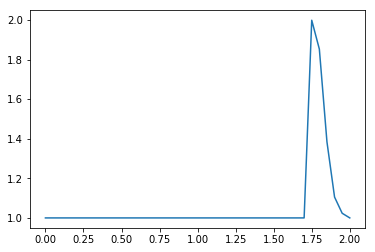

In [3]:
nonlinearburgers(41)   #try the function with various grid spacings   

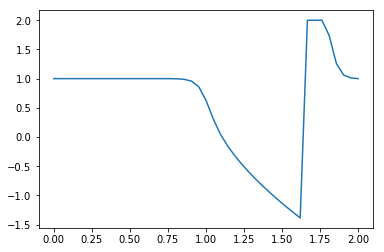

In [6]:
nonlinearburgers(43)   #try the function with various grid spacings  

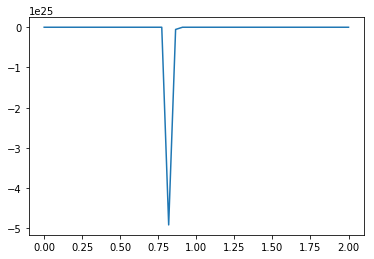

In [7]:
nonlinearburgers(45)   #try the function with various grid spacings  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


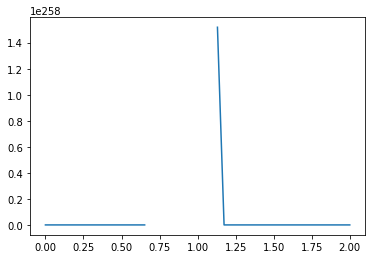

In [13]:
nonlinearburgers(47)   #try the function with various grid spacings  

In [14]:
#Remember: Comments in python are denoted by the pound sign 
import numpy                   # Load the numpy maxrix algebra library 
from matplotlib import pyplot  # Load pyplot from the matplotlib librry for 2D plotting
#import time, sys               # Load the time and system utilities.

# The following code makes the matplotlib plots appear in the notebook instead of a separate window.
%matplotlib inline 

#make the code into a subroutine that takes the number of x axis grid points nx as input.
def nonlinearburgers1(nx):
    #define our initial grid parameters
    dx = 2 / (nx-1) # distance between grid lines
    nt = 25       #nt = number of time steps we want to calculate
    
    sigma = 0.5
    #dt = .025    #dt = amount of time each time step covers (delta t)
    dt = sigma*dx    #dt = amount of time each time step covers (delta t)

    #setup the initial conditions u = 1 from 0 to .5 then U= 2 from .5 to 1.0 then u = 1 from 1 -> 2
    #note Boundary Conditions u = 1 at x = 0 and x = 2
    u = numpy.ones(nx)    #use the numpy library function ones to create our array
    u[int(.5/dx):int(1/dx + 1)] = 2 # setting u = 2 between x - .5 and 1 as per our initial conditions

    un = numpy.ones(nx) # initialize a temporary array

    for n in range(nt): #loop for values of n from 0 to nt, ie the outter loop will run nt times.
        un = u.copy()   ## copy the existing values of u into un.
        for i in range(2, nx-1): ## try commenting out this line 
            u[i] = un[i] - un[i]*dt / dx*(un[i] - un[i-1])
        
    pyplot.plot(numpy.linspace(0, 2, nx), u); 

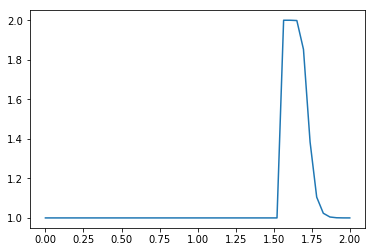

In [15]:
nonlinearburgers1(47)   #try the function with various grid spacings 

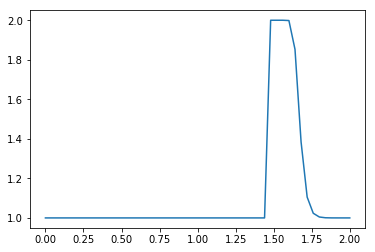

In [16]:
nonlinearburgers1(51)   #try the function with various grid spacings 

Learn More
For a more thorough explanation of the finite-difference method, including topics like the
truncation error, order of convergence and other details, watch Video Lessons 2 and 3 by
Prof. Barba on YouTube.

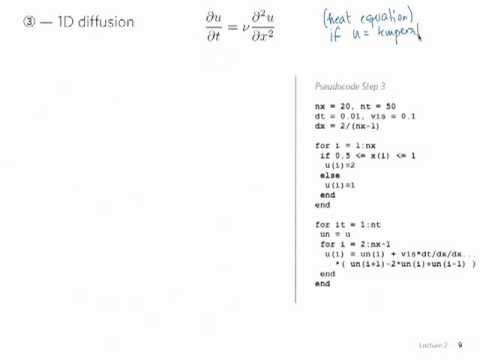

In [47]:
# Lecture "zero", part 3
from IPython.display import YouTubeVideo
YouTubeVideo('y2WaK7_iMRI')

In [48]:
from IPython.core.display import HTML
def css_styling():
    styles - open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

NameError: name 'styles' is not defined